# Amazon Best Selling Books From 2009 to 2019


# Introduction

Amazon, founded by Jeff Bezos in 1994 as an online bookstore, has evolved into a global e-commerce and technology giant. Headquartered in Seattle, Washington, Amazon is renowned for its vast product offerings, from books and electronics to groceries and streaming services. The company's commitment to customer satisfaction, exemplified by its efficient delivery services and customer-centric approach, has propelled it to the forefront of the retail industry. 

Beyond e-commerce, Amazon has diversified into cloud computing with Amazon Web Services (AWS), entertainment with Amazon Prime Video, and smart devices like the Kindle and Echo. With a pervasive global presence, Amazon continues to shape and redefine the future of commerce and technology.

# Aim of Project

The aim of this project is to Unravel what type of books were bought frequently, between 2009 and 2019.

* Top 10 Authors - Based on the number of times their names appeared in the best selling listings from 2009 to 2019

* The Top 10 Books - Based on the number of times the book appeared as a best selling book from 2009 to 2019

* Top 10 Authors with highest User Ratings

* Top 10 Authors with highest Reviews

* Top 10 Best Selling Books by Number of Reviews

* Top Rated Authors from 2009 t0 2019

* Top rated Books from 2009 to 2019

* Number of books by cover type

* Book by Top Average price

* Relationship between rating and price

* Relationship between the Price of Books and Years


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
amazon_book = pd.read_csv('amazon_books_2009-2019.csv')

amazon_book

,Unnamed: 0,price,rank,title,no_of_reviews,ratings,author,cover_type,year
0,0,15.73,1.0,The Lost Symbol (Robert Langdon),29033.0,4.3,Dan Brown,Hardcover,2009
1,1,10.14,2.0,The Shack: Where Tragedy Confronts Eternity,41131.0,4.6,William P. Young,Paperback,2009
2,2,14.76,3.0,Liberty and Tyranny: A Conservative Manifesto,5340.0,4.8,Mark R. Levin,Hardcover,2009
3,3,20.49,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",25436.0,4.7,Stephenie Meyer,Hardcover,2009
4,4,6.30,5.0,Going Rogue: An American Life,1598.0,4.6,Sarah Palin,Hardcover,2009
...,...,...,...,...,...,...,...,...,...
893,893,4.99,96.0,How to Draw 101 Animals (1),24653.0,4.7,Dan Green,Paperback,2019
894,894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
895,895,15.90,98.0,Simply Keto: A Practical Approach to Health & ...,9484.0,4.6,Suzanne Ryan,Paperback,2019
896,896,9.49,99.0,The Outsiders,30584.0,4.8,S. E. Hinton,Paperback,2019


# Data Cleaning

In [3]:
amazon_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     898 non-null    int64  
 1   price          895 non-null    float64
 2   rank           895 non-null    float64
 3   title          892 non-null    object 
 4   no_of_reviews  895 non-null    float64
 5   ratings        895 non-null    float64
 6   author         893 non-null    object 
 7   cover_type     894 non-null    object 
 8   year           898 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 63.3+ KB


In [4]:
# looking for duplicate values

amazon_book.duplicated().sum()

0

In [5]:
# Removing the unnamed colunn

amazon_book.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# looking for null values

amazon_book.isna().sum()

price            3
rank             3
title            6
no_of_reviews    3
ratings          3
author           5
cover_type       4
year             0
dtype: int64

In [7]:
# Checking the percentage of missing values

missing_values = amazon_book.isna().mean().round(2)*100
missing_rows = pd.DataFrame(missing_values, columns=['missing values'])
missing_rows

,missing values
price,0.0
rank,0.0
title,1.0
no_of_reviews,0.0
ratings,0.0
author,1.0
cover_type,0.0
year,0.0


In [8]:
# removing the null values

amazon_book.dropna(inplace=True)

In [9]:
amazon_book.isna().sum()

price            0
rank             0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
dtype: int64

In [10]:
# Checking the data type
amazon_book.dtypes

price            float64
rank             float64
title             object
no_of_reviews    float64
ratings          float64
author            object
cover_type        object
year               int64
dtype: object

In [11]:
# Converting rank column from float to int

amazon_book['rank'] = amazon_book['rank'].astype('int64')

In [12]:
# Converting ranks column data type from float to int
amazon_book['no_of_reviews'] = amazon_book['no_of_reviews'].astype('int64')

In [13]:
amazon_book.dtypes

price            float64
rank               int64
title             object
no_of_reviews      int64
ratings          float64
author            object
cover_type        object
year               int64
dtype: object

# Exploratory Data Analysis (EDA)

### Top 10 Authors (Best selling authors)

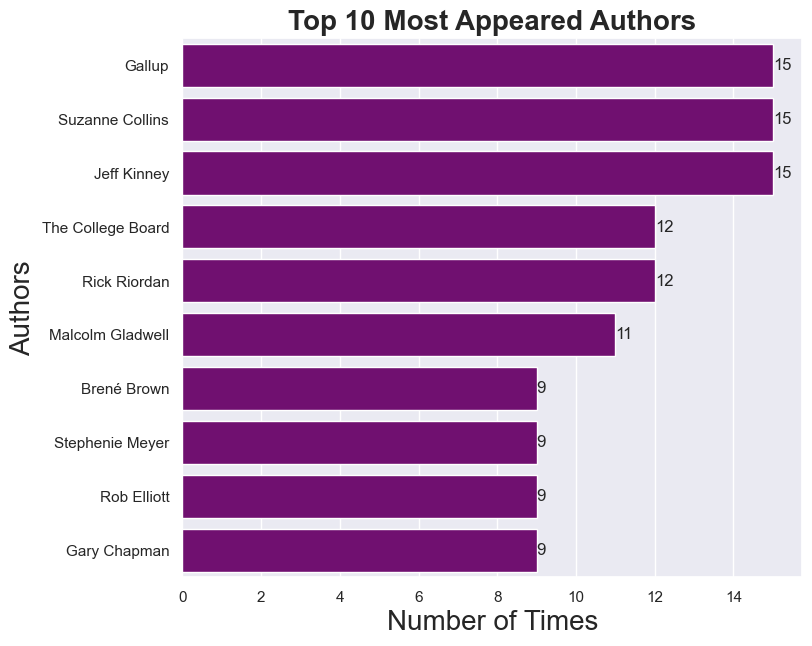

In [14]:
# Top 10 Authors - Based on the number of times their names appeared in the best selling listings from 2009 to 2019

plt.figure(figsize=[8, 7])
ax = sns.barplot(
    data = amazon_book.author.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'author',
    color='purple'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Number of Times', fontsize=20)
plt.ylabel('Authors', fontsize=20)

plt.title("Top 10 Most Appeared Authors", weight='bold', fontsize = 20)
plt.show()

Based on the number of times these authors book appeared from 2009 to 2019, the top authors are Gallup, SuzanneCollins and Jeff Kinney

### The Top 10 Books - Based on the number of times the book appeared as a best selling book from 2009 to 2019


In [40]:
# Top 10 authors based on number of times their books appeared in top list
pd.DataFrame(amazon_book.title.value_counts()).head(10)

,title
StrengthsFinder 2.0,11
The Official SAT Study Guide,9
The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are,7
The Great Gatsby: The Only Authorized Edition,7
"Oh, the Places You'll Go!",7
"Publication Manual of the American Psychological Association, 6th Edition",7
What to Expect When You're Expecting,7
"The Care and Keeping of You: The Body Book for Younger Girls, Revised Edition (American Girl Library)",7
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",6
"Jesus Calling, Padded Hardcover, with Scripture References: Enjoying Peace in His Presence (A 365-Day Devotional)",6


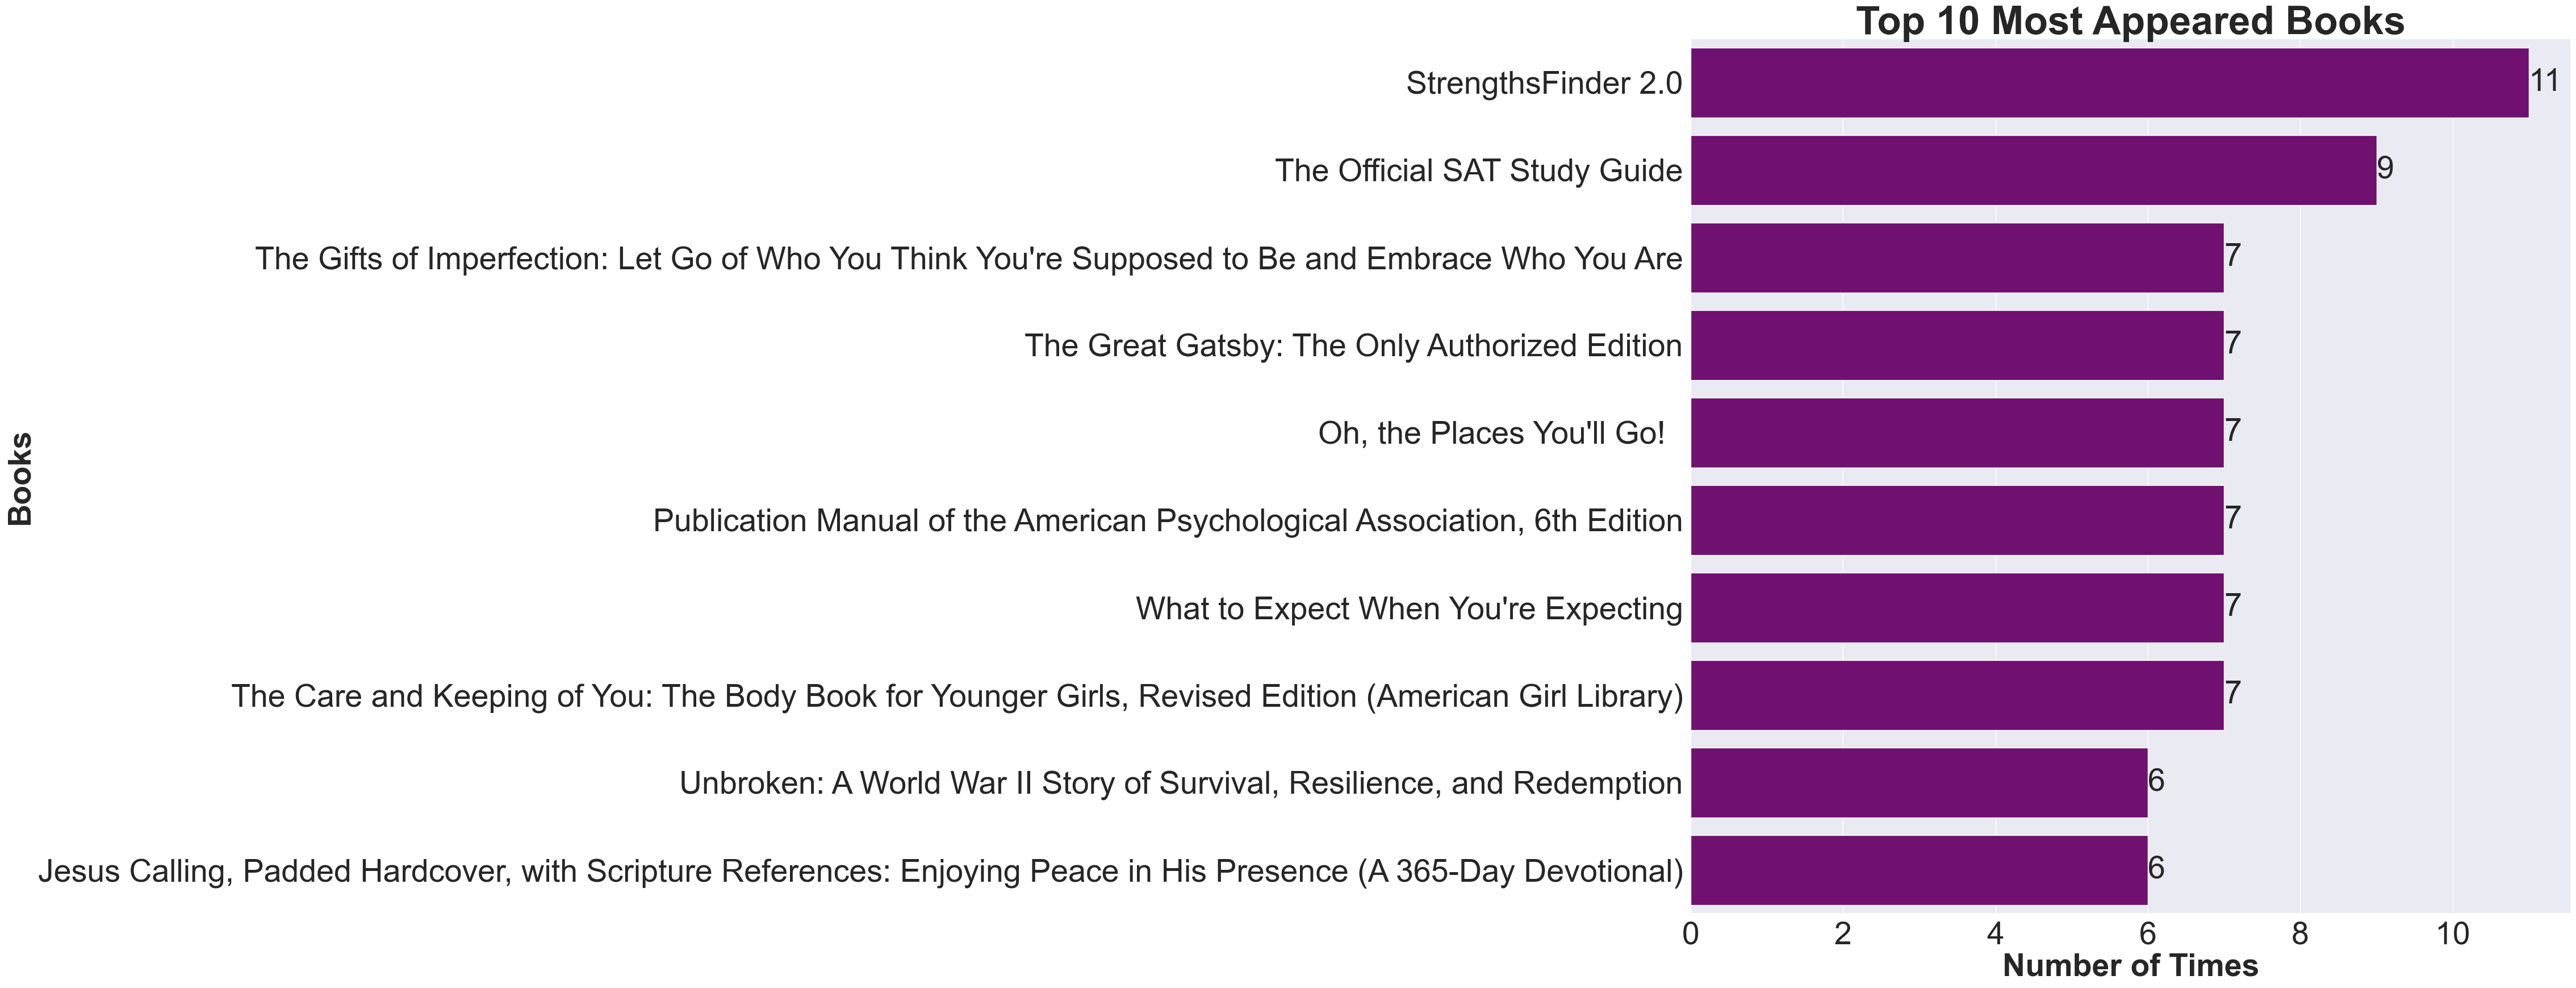

In [47]:
plt.rcParams['figure.figsize'] = (20, 20)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=40)
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40)

ax = sns.barplot(
    data = amazon_book.title.value_counts().head(10).reset_index(),
    y = 'index',
    x = 'title',
    color='purple'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Number of Times', weight='bold', fontsize=40)
plt.ylabel('Books', weight='bold', fontsize=40)

plt.title("Top 10 Most Appeared Books", weight='bold', fontsize=50)
plt.show()

StrengthsFinder 2.0 is the top best selling book, followed by The Official SAT Study Guide, The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are

### Top 10 Authors with highest User Ratings

In [49]:
# Top 10 authors with highest user rating
user_rating = pd.DataFrame(amazon_book.groupby(['author', 'title'])['ratings'].sum().sort_values(ascending=False).reset_index()).head(10)
user_rating

,author,title,ratings
0,Gallup,StrengthsFinder 2.0,45.1
1,The College Board,The Official SAT Study Guide,39.8
2,Dr. Seuss,"Oh, the Places You'll Go!",34.3
3,Valorie Schaefer,The Care and Keeping of You: The Body Book for...,33.6
4,Heidi Murkoff,What to Expect When You're Expecting,33.6
5,American Psychological Association,Publication Manual of the American Psychologic...,31.5
6,F. Scott Fitzgerald,The Great Gatsby: The Only Authorized Edition,31.0
7,Sarah Young,"Jesus Calling, Padded Hardcover, with Scriptur...",29.4
8,Brené Brown,The Gifts of Imperfection: Let Go of Who You T...,28.2
9,Don Miguel Ruiz,The Four Agreements: A Practical Guide to Pers...,28.2


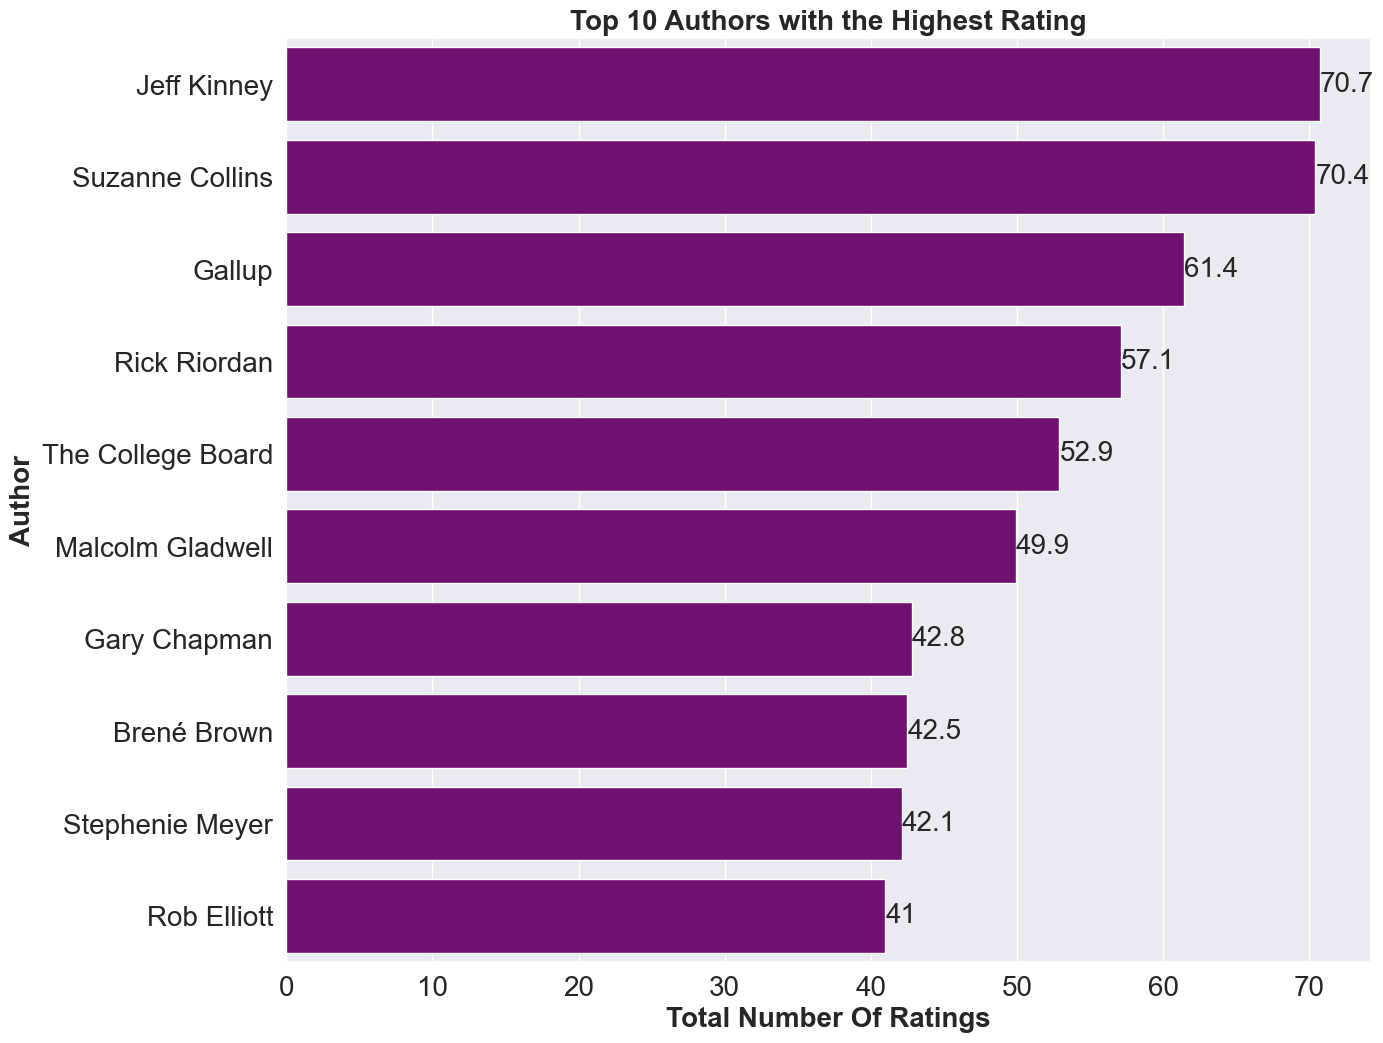

In [50]:
# visualizing the top 20 authors based on ratings
plt.rcParams['figure.figsize'] = (14, 12)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = amazon_book.groupby('author')['ratings'].sum().sort_values(ascending=False).reset_index()[:10],
    y = 'author',
    x = 'ratings',
    color='purple'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total Number Of Ratings', weight='bold',  fontsize=20)
plt.ylabel('Author', weight='bold',  fontsize=20)

plt.title("Top 10 Authors with the Highest Rating", weight='bold', fontsize=20)
plt.show()

From the table and chart above, we can see that jeff Kinney has the highest rating with 70.7, followed by Suzanne Collins with 70.4 and Gallup with 61.4 ratings 

### Top 10 Authors with highest Reviews

In [19]:
# Top 10 authors with highest user rating
highest_review = pd.DataFrame(amazon_book.groupby('author')['no_of_reviews'].sum().sort_values(ascending=False).reset_index()).head(10)
highest_review

,author,no_of_reviews
0,Delia Owens,1301999
1,Paula Hawkins,984170
2,Suzanne Collins,921570
3,Harper Lee,643836
4,Dale Carnegie,638789
5,Don Miguel Ruiz,626641
6,Paulo Coelho,623435
7,John Green,582234
8,E L James,572711
9,Dungeons & Dragons,491604


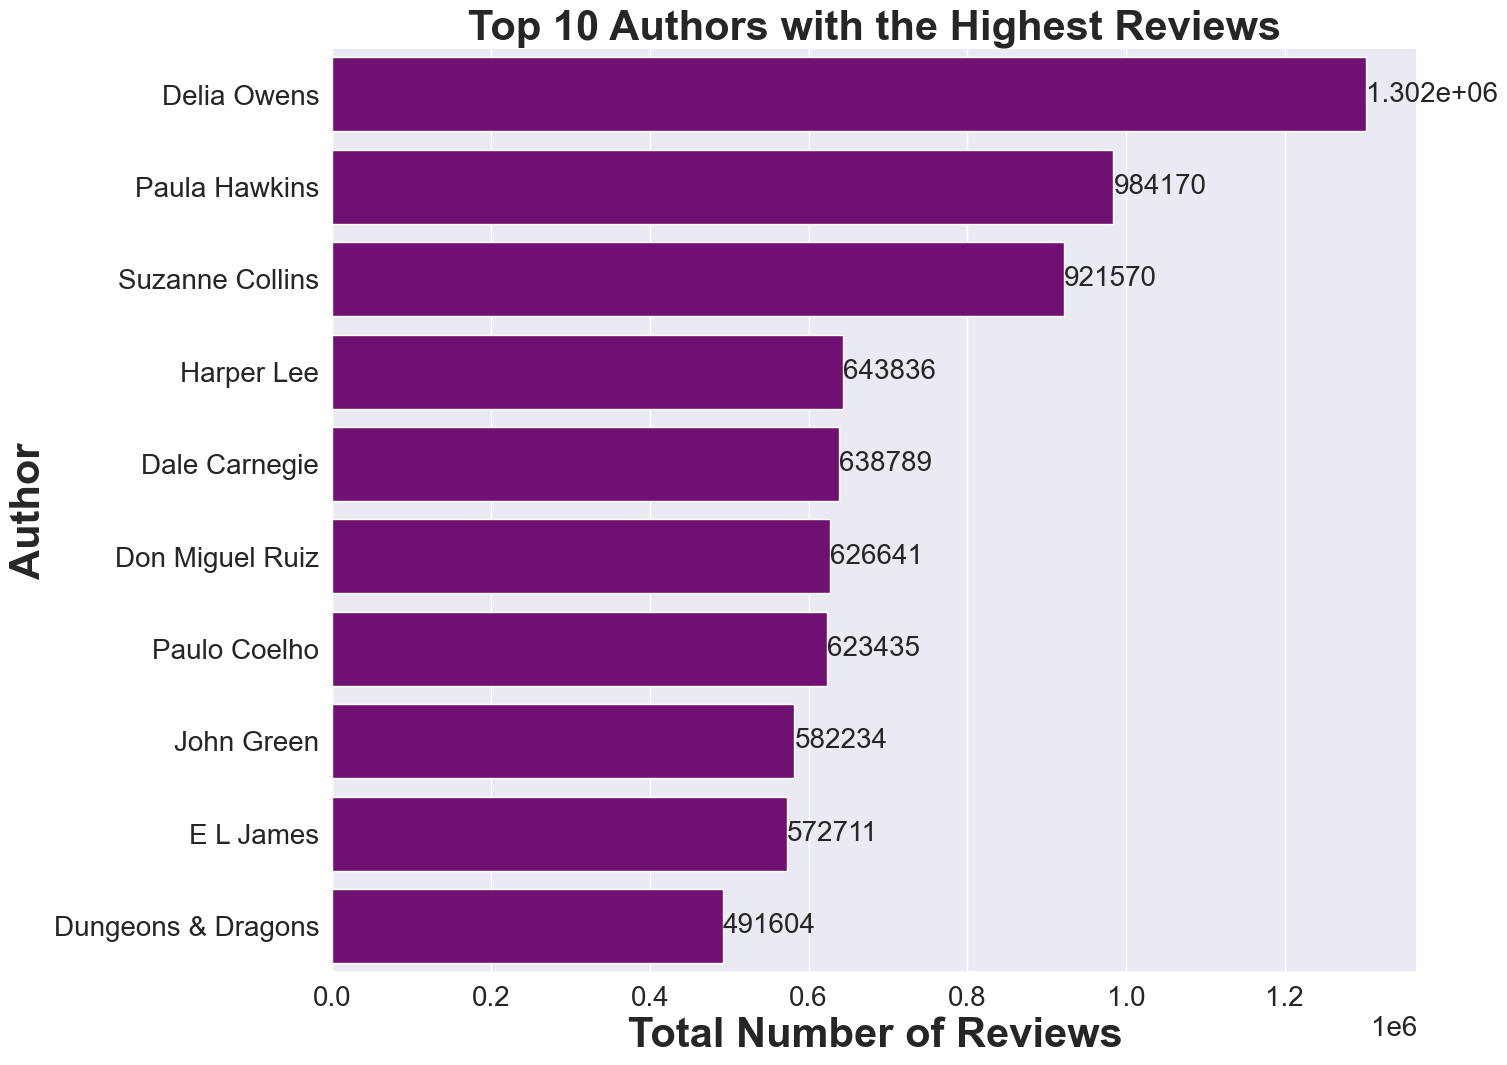

In [20]:
# visualizing the top 10 authors based on reviews
plt.rcParams['figure.figsize'] = (14, 12)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = amazon_book.groupby('author')['no_of_reviews'].sum().sort_values(ascending=False).reset_index()[:10],
    y = 'author',
    x = 'no_of_reviews',
    color='purple'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total Number of Reviews',  weight='bold', fontsize=30)
plt.ylabel('Author', weight='bold', fontsize=30)

plt.title("Top 10 Authors with the Highest Reviews", weight='bold', fontsize=30)
plt.show()

From the table and chart above, we can see that Delia Owens has the highest reviews with 1,301,999 followed by Paula Hawkins with 984,170, Suzanne Collins with 921,570 reviews

In [21]:
#amazon_book

### Top 10 Best Selling Books by Number of Reviews

In [22]:
# Top 10 best selling books by number of reviews
best_selling_book = pd.DataFrame(amazon_book.groupby('title')['no_of_reviews'].sum().sort_values(ascending=False).reset_index()).head(10)
best_selling_book

,title,no_of_reviews
0,Where the Crawdads Sing,1301999
1,The Girl on the Train,984170
2,The Four Agreements: A Practical Guide to Pers...,626641
3,"The Alchemist, 25th Anniversary: A Fable About...",611987
4,To Kill a Mockingbird,591390
5,How to Win Friends & Influence People (Dale Ca...,559695
6,The Fault in Our Stars,480087
7,"Unbroken: A World War II Story of Survival, Re...",452622
8,All the Light We Cannot See,430546
9,The 5 Love Languages: The Secret to Love that ...,428730


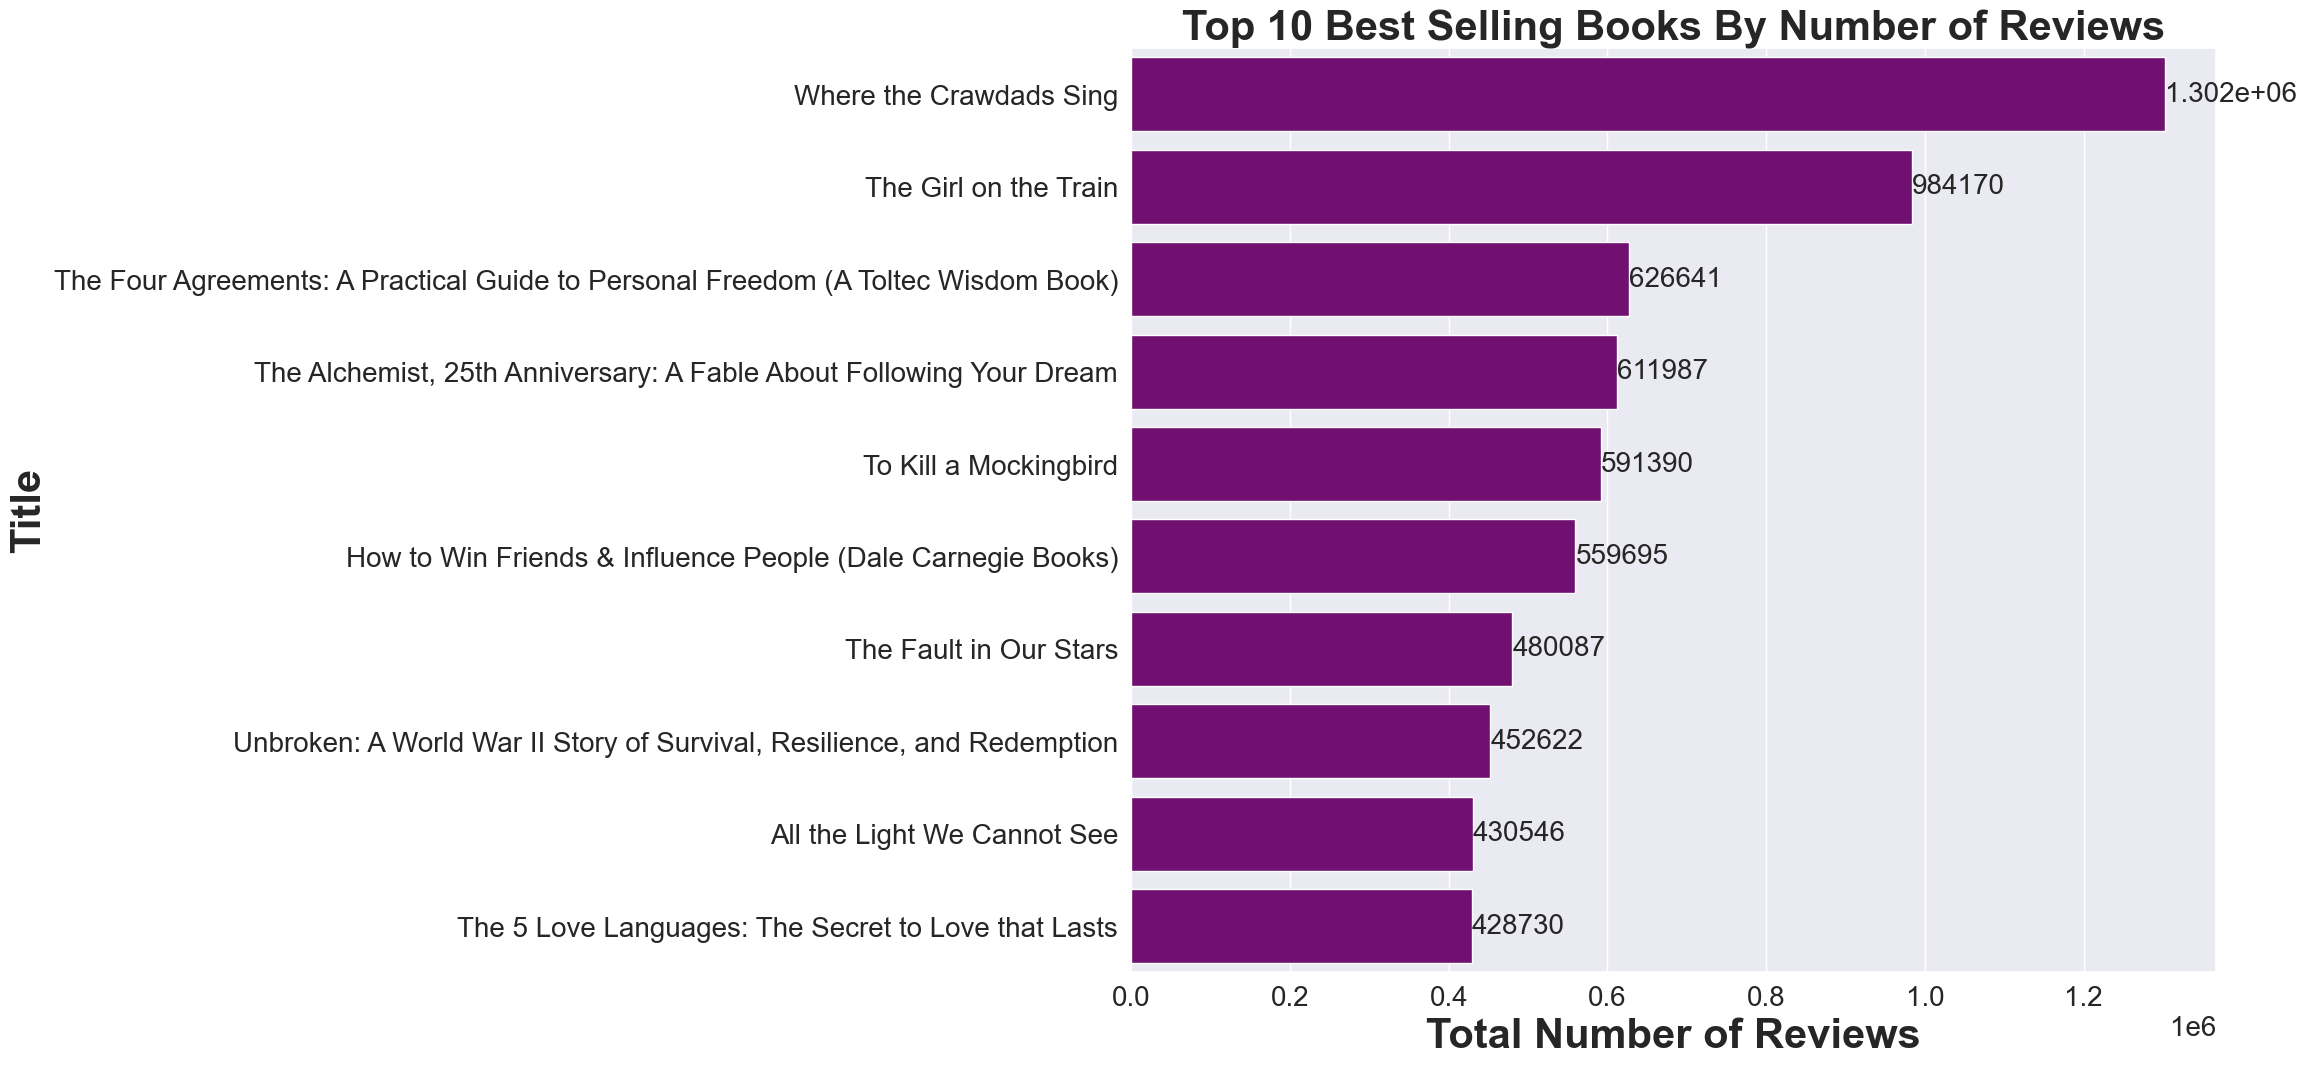

In [51]:
# visualizing the Top 10 best selling books by number of reviews
plt.rcParams['figure.figsize'] = (14, 12)

#set label sizes for axes, xtick and ytick
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

ax = sns.barplot(
    data = best_selling_book.groupby('title')['no_of_reviews'].sum().sort_values(ascending=False).reset_index()[:10],
    y = 'title',
    x = 'no_of_reviews',
    color='purple'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total Number of Reviews',  weight='bold', fontsize=30)
plt.ylabel('Title', weight='bold', fontsize=30)

plt.title("Top 10 Best Selling Books By Number of Reviews", weight='bold', fontsize=30)
plt.show()

From the chart above, we can see that the best selling book by number of review is Where the Crawdads Sing with 1,301,999 followed by The Girl on the Train with 984,170 and The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book) with 626,641 reviews.

From the the top 10 authors analyzed earlier, the best 3 authors with highest review were Delia Owens, Paula Hawkins, and Suzanne Collins while the this analysis for the best selling book by number of reviews, the authors are Delia Owens, Paula Hawkins and Don Miguel Ruiz

### Top Rated Authors from 2009 to 2019

In [24]:
top_rated_author = amazon_book.groupby(['author'])['ratings'].mean().sort_values(ascending=False).reset_index().head(10)
top_rated_author

,author,ratings
0,Patrick Thorpe,4.9
1,Rush Limbaugh,4.9
2,J. Kenji López-Alt,4.9
3,Shel Silverstein,4.9
4,Dr. Seuss,4.9
5,Margaret Wise Brown,4.9
6,Sherri Duskey Rinker,4.9
7,Andrea Beaty,4.9
8,Robert Munsch,4.9
9,Emily Winfield Martin,4.9


We can see from the table above that the top 10 rated authors are Patrick Thorpe, Rush Limbaugh, J.Kenji Lopez-Alt etc

### Top rated Books from 2009 to 2019

In [25]:
top_rated_book = amazon_book.groupby(['author', 'title'])['ratings'].mean().sort_values(ascending=False).reset_index().head(10)
top_rated_book

,author,title,ratings
0,Dungeons & Dragons,Xanathar's Guide to Everything (Dungeons & Dra...,4.9
1,Eric Carle,The Very Hungry Caterpillar,4.9
2,Emily Winfield Martin,The Wonderful Things You Will Be,4.9
3,J. Kenji López-Alt,The Food Lab: Better Home Cooking Through Science,4.9
4,J.K. Rowling,Harry Potter and the Sorcerer's Stone: The Ill...,4.9
5,Patrick Thorpe,The Legend of Zelda: Hyrule Historia,4.9
6,Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",4.9
7,Bill Martin Jr.,Chicka Chicka Boom Boom (Board Book),4.9
8,Dungeons & Dragons,Love You Forever,4.9
9,Dungeons & Dragons,D&D Player’s Handbook (Dungeons & Dragons Core...,4.9


From the table above, we can see the authors that has the top rating and the title of thier books

### Number of books by cover type

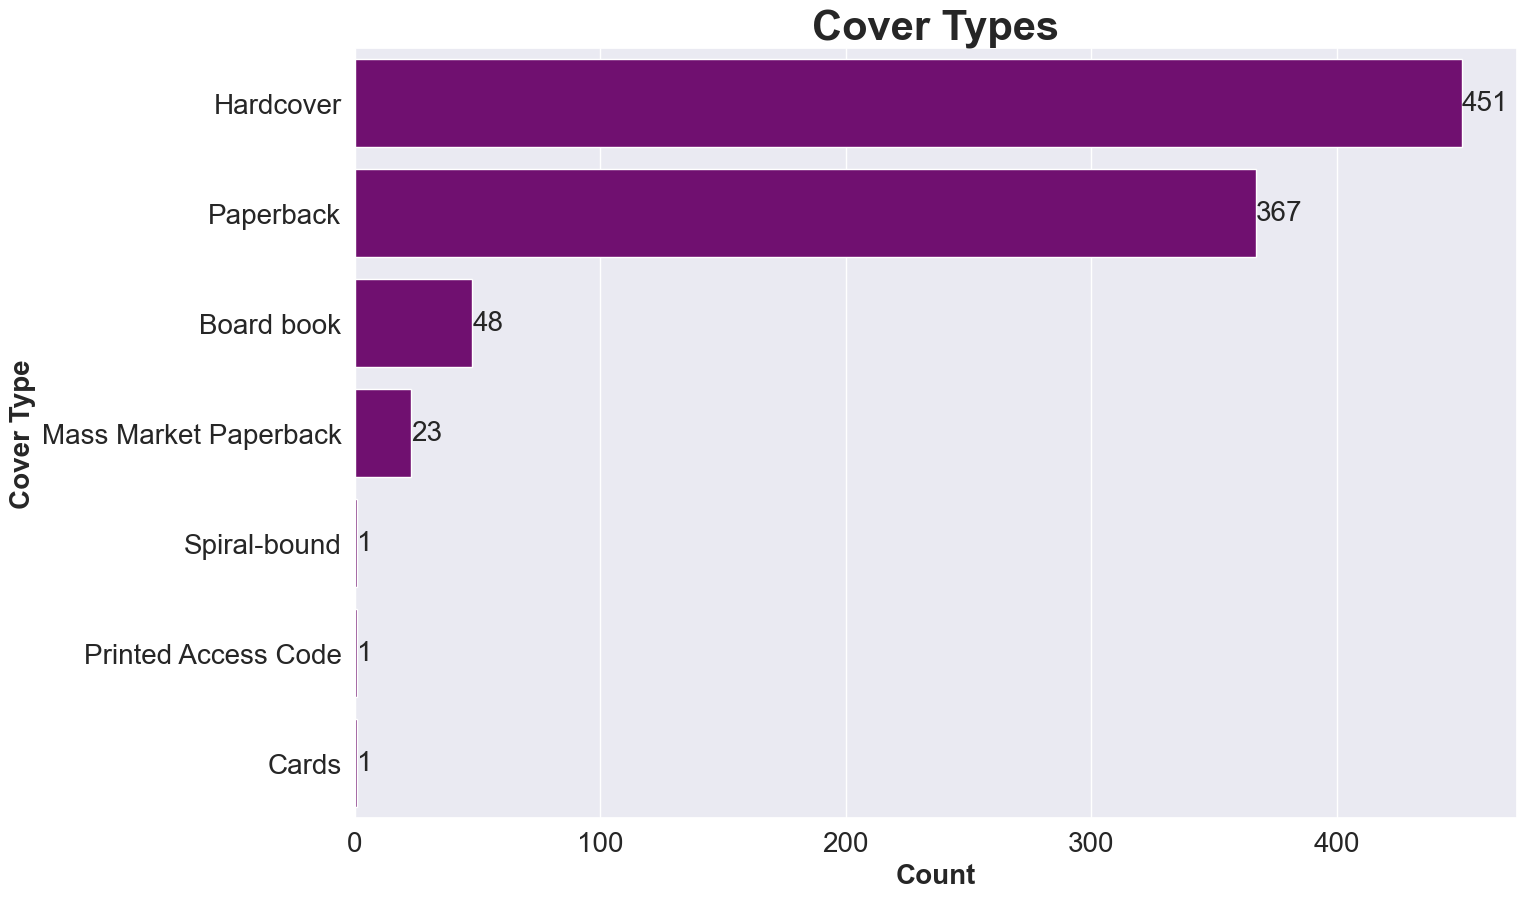

In [26]:
# Visualizing the number of books by cover type

plt.figure(figsize = (15,10))
ax = sns.barplot(
data = amazon_book.cover_type.value_counts().head(10).reset_index(),
y = 'index',
x = 'cover_type',
color = 'purple'
)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Count', weight='bold', fontsize=20)
plt.ylabel('Cover Type', weight='bold', fontsize=20)

plt.title("Cover Types", weight='bold', fontsize = 30)
plt.show()

The above chart indicated that Hardcover has the highest number of book with 451 followed by paperback 367 and boardbook with 48

### Book by Top Average price

In [33]:
book_price = pd.DataFrame(amazon_book.groupby(['author', 'title'])['price'].mean().sort_values(ascending=False).head(10))
book_price

,,price
author,title,
American Psychiatric Association,"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",93.49
Hall H Pearson Education,MyMathLab: Student Access Kit,75.49
The College Board,The Official SAT Study Guide: For the New SAT (tm),71.93
Charlaine Harris,Sookie Stackhouse,59.99
Veronica Roth,Divergent / Insurgent / Allegiant,58.68
Stephenie Meyer,The Twilight Saga Collection,58.00
ACT,The Real ACT Prep Guide,57.97
Stephanie Milton,Minecraft: The Complete Handbook Collection,52.99
Kelly Starrett,"Becoming a Supple Leopard: Movement, Mobility, and Maintenance of the Human Animal",50.41


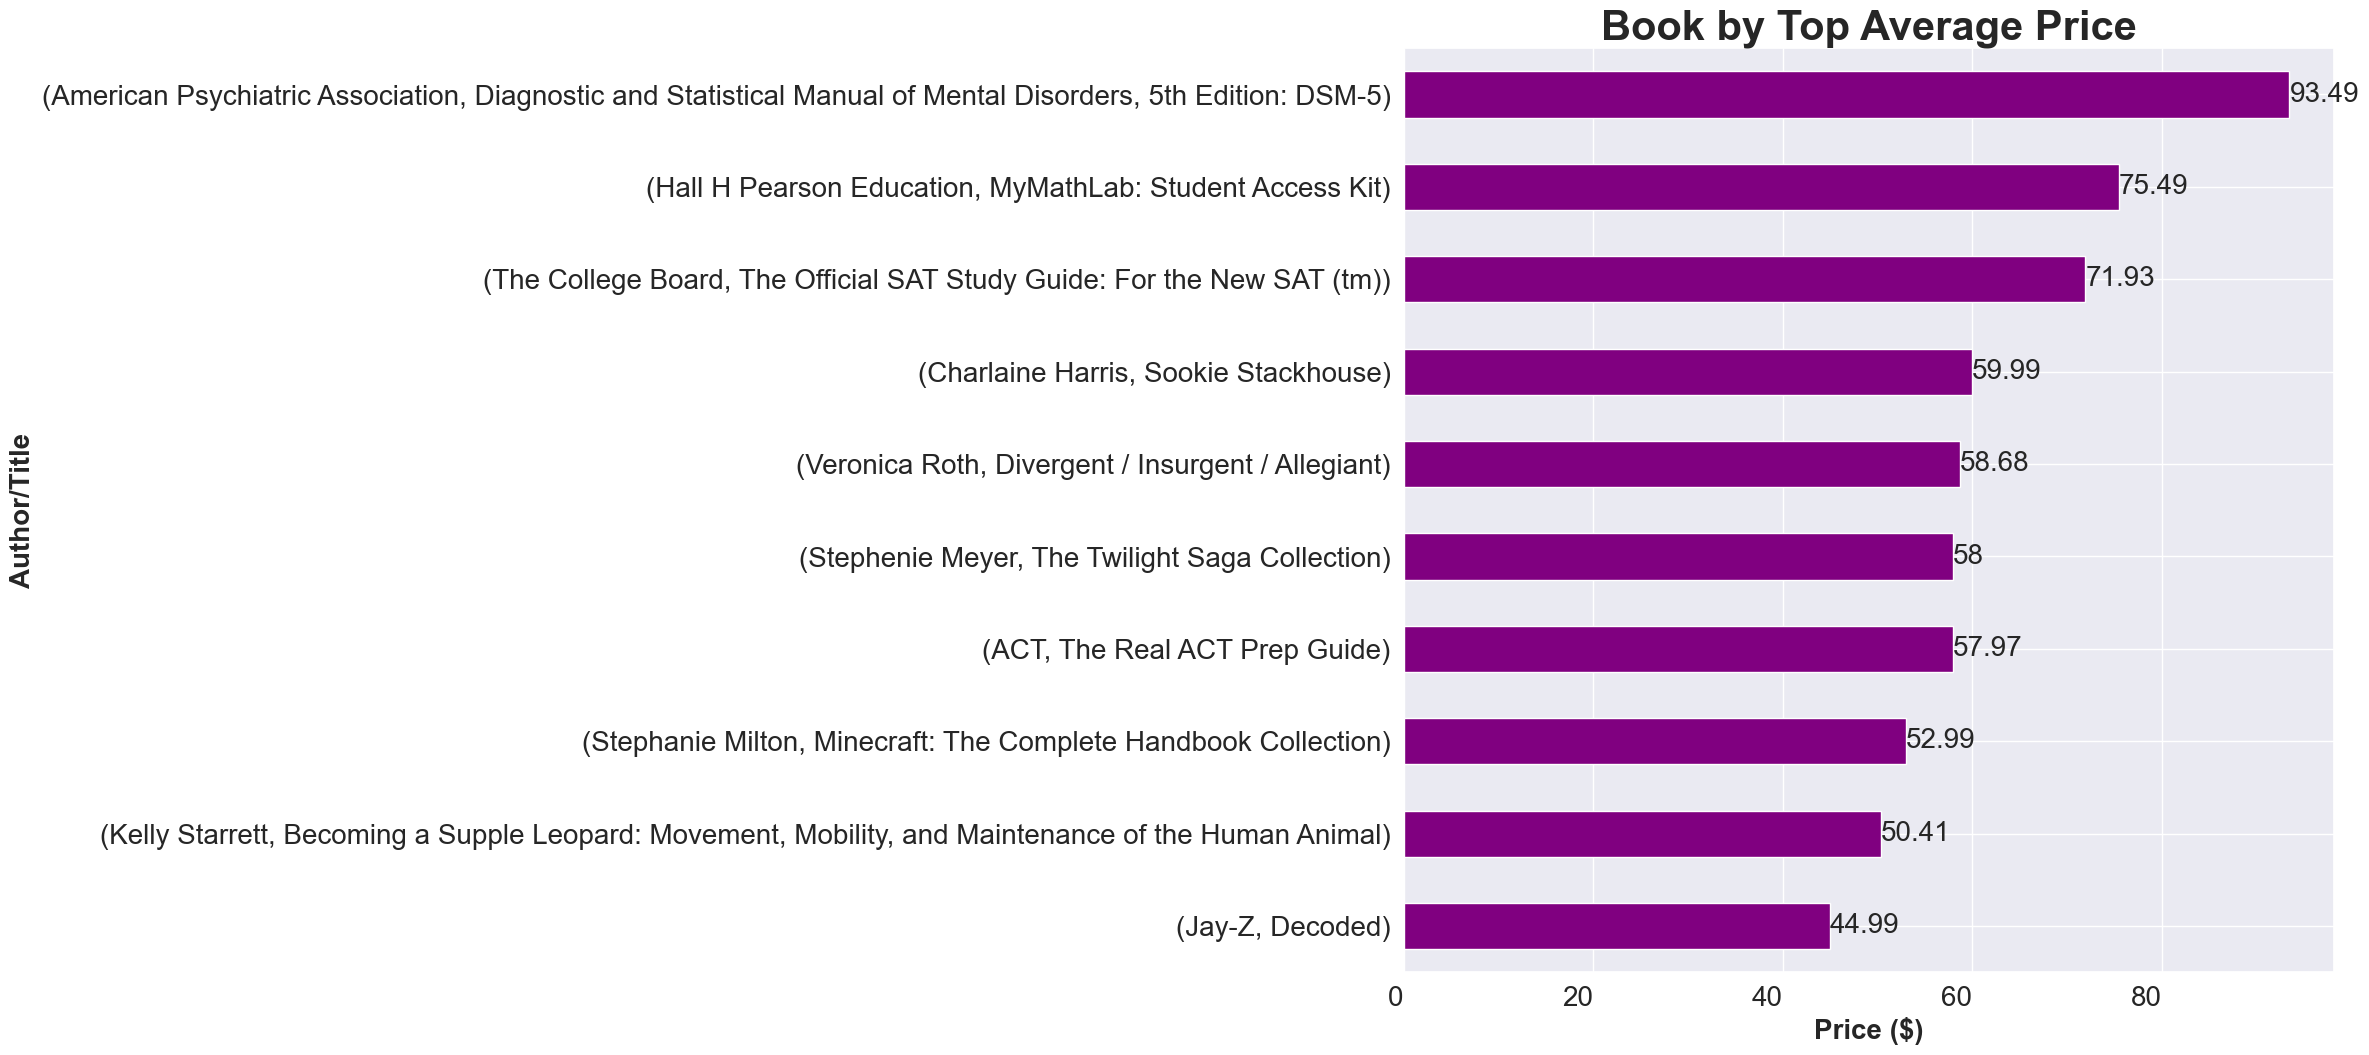

In [55]:
# Plotting the data
plt.figure(figsize=(12, 12))
ax = book_price['price'].sort_values(ascending=True).plot(kind='barh', color='purple')
plt.title('Book by Top Average Price', weight='bold', fontsize=30)
plt.xlabel('Price ($)', weight='bold', fontsize=20)
plt.ylabel('Author/Title', weight='bold', fontsize=20)
plt.xticks(ha='right')

for i in ax.containers:
    ax.bar_label(i)

    
plt.tight_layout()
plt.show()

Book by top average price is Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5, authored by American Psychiatric Association with the average price of 93.49, followed by MyMathLab: Student Access Kit, authored by Hall H Pearson Education with 75.49, and The Official SAT Study Guide: For the New SAT (tm), authored by The College Board with average prce of 71.93

### Relationship between rating and price


In [35]:
# correlation method is pearson

amazon_book.corr(method = 'pearson')

,price,rank,no_of_reviews,ratings,year
price,1.000000,0.064825,-0.067669,-0.070836,-0.201352
rank,0.064825,1.000000,-0.214581,0.022895,-0.011153
no_of_reviews,-0.067669,-0.214581,1.000000,0.002716,0.254273
ratings,-0.070836,0.022895,0.002716,1.000000,0.252953
year,-0.201352,-0.011153,0.254273,0.252953,1.000000


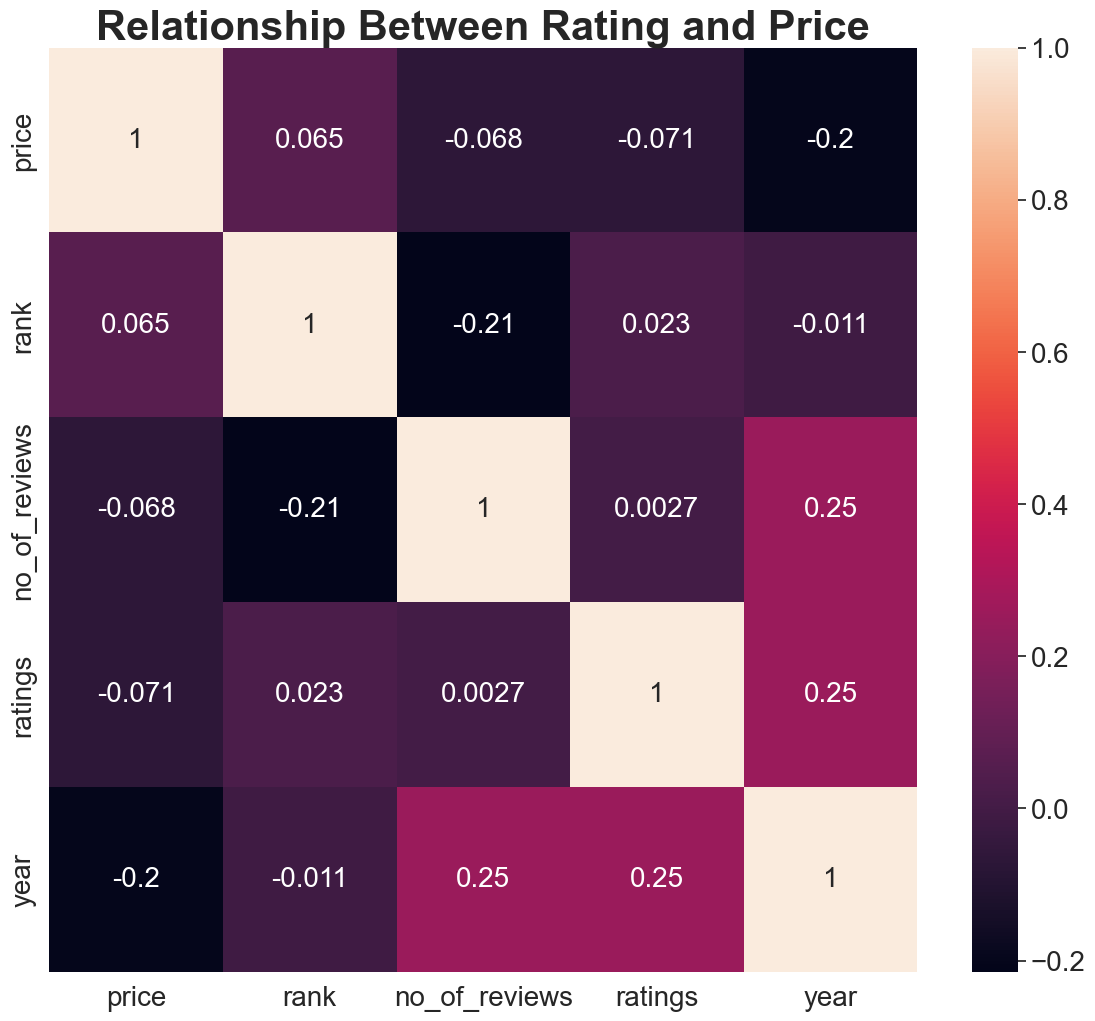

In [57]:
corr_matrix = amazon_book.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Relationship Between Rating and Price', weight='bold', fontsize=30)
plt.show()

There is no relationship between rating and price

### Relationship between the Price of Books and Years

In [39]:
# get the average price for each year
best_selling_year = amazon_book.groupby('year').price.sum().sort_values(ascending=False)
best_selling_year

year
2009    1288.12
2013    1236.07
2012    1224.43
2011    1223.07
2014    1177.49
2010    1169.26
2019    1076.77
2018    1000.26
2015     940.60
2017     920.80
2016     838.28
Name: price, dtype: float64

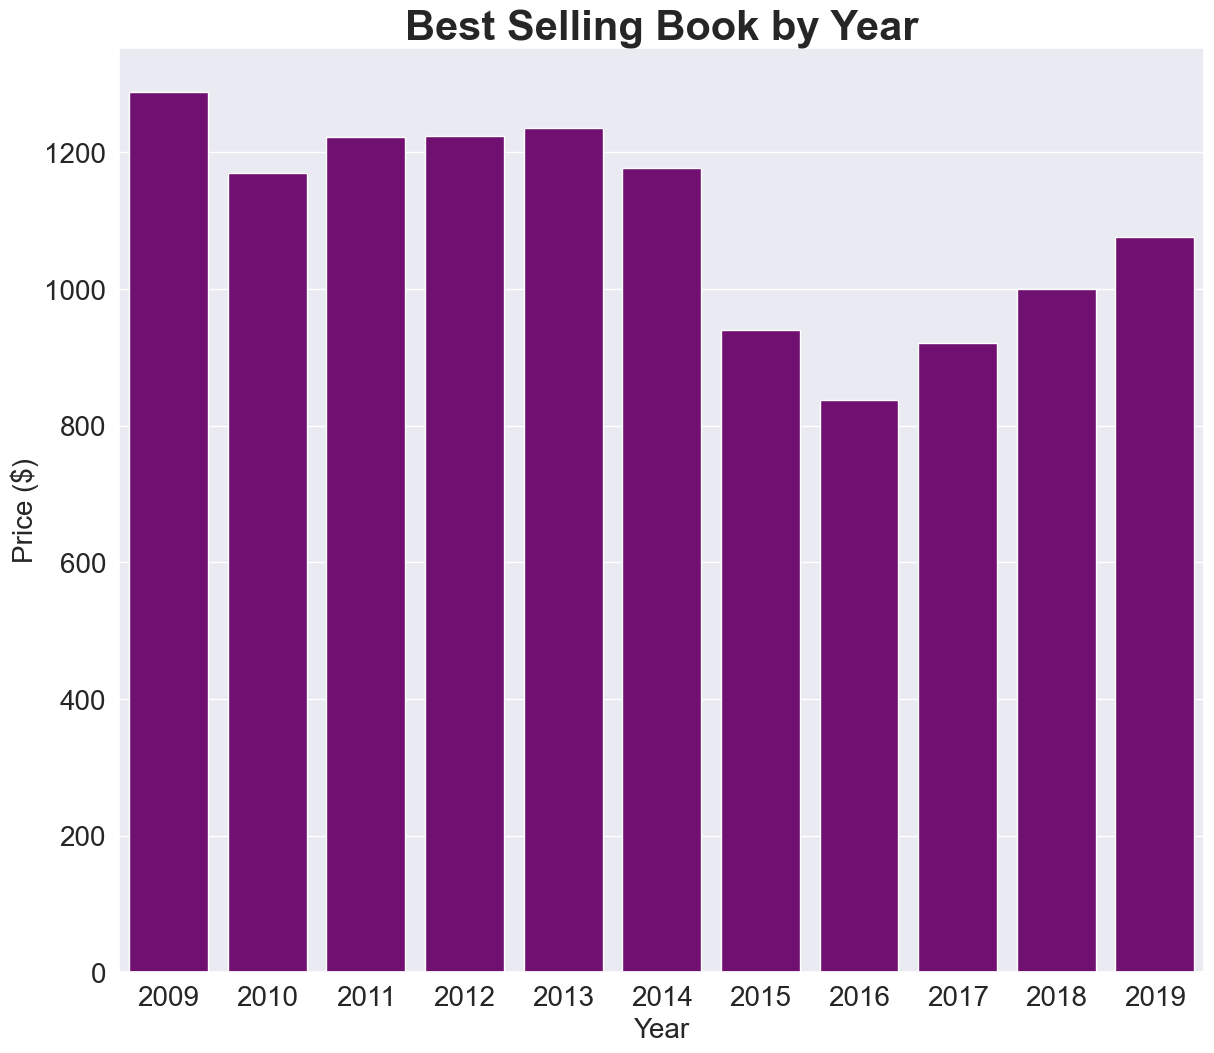

In [38]:
sns.barplot(x = best_selling_year.index, y= best_selling_year, color='purple')
plt.ylabel('Price ($)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Best Selling Book by Year', weight='bold', fontsize = 30);

We observed that 2009 had the highest best selling book with the sum of 1288.12 followed by 2003 with 1236.07 and 2013 with 1224.43. The sum price of books decreased in year 2016

# Conclusion

* Gallup, Suzanne Collins, and Jeff Kinney are the top authors based on the number of times their books appeared from 2009 to 2019.

* StrengthsFinder 2.0 is the top best selling book, followed by The Official SAT Study Guide, The Gifts of Imperfection: Let Go of Who You Think You're Supposed to Be and Embrace Who You Are

* Jeff Kinney has the highest rating with 70.7, followed by Suzanne Collins with 70.4 and Gallup with 61.4 ratings

* Delia Owens has the highest reviews with 1,301,999 followed by Paula Hawkins with 984,170, Suzanne Collins with 921,570 reviews

* The best selling book by number of review is Where the Crawdads Sing with 1,301,999 followed by The Girl on the Train with 984,170 and The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book) with 626,641 reviews.

* The best 3 authors with highest review were Delia Owens,Paula Hawkins, and Suzanne Collins while the this analysis for the best selling book by number of reviews,the authors are Delia Owens, Paula Hawkins and Don Miguel Ruiz

* The top 10 rated authors are Patrick Thorpe, Rush Limbaugh, J.Kenji Lopez-Alt etc

* Hardcover has the highest number of book with 451 followed by paperback 367 and boardbook with 48

* Book by top average price is Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5, authored by American Psychiatric Association with the average price of 93.49, followed by MyMathLab: Student Access Kit, authored by Hall H Pearson Education with 75.49, and The Official SAT Study Guide: For the New SAT (tm), authored by The College Board with average prce of 71.93

* There is no relationship between rating and price

* We observed that 2009 had the highest best selling book with the sum of 1288.12 followed by 2003 with 1236.07 and 2013 with 1224.43. The sum price of books decreased in year 2016